#### Loading data into local variables

In [ ]:
# Ignore the warnings - Otherwise, TensorFlow tends to innundate one with far too many warnings.
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# For matrix operations and dataframes.
import numpy as np

# Data visualizaton.
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import random as rn
 
# Configure some defaults.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# Useful deep learning functions.
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout, Flatten, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Powerful deep learning module.
import tensorflow as tf

# For dealing with data.
import numpy as np  
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
# Fetch the data:
(X, y), (test_x, test_y) = cifar10.load_data()
test_y_orig = test_y
test_y = to_categorical(test_y, 10)

X = preprocess_input(X)
test_x = preprocess_input(test_x)

In [ ]:
def generateData(x, y, target_class):
  mod = 10
  total = 0
  a = np.where(y==target_class)
  b = np.where(y!=target_class)
  target_x = x[a[0]]
  target_y = y[a[0]]
  other_x = x[b[0]]
  other_y = y[b[0]]
  train_x = np.zeros((51200, 32, 32, 3))
  train_y = np.zeros((51200, ))
  for i in range(50):
    for j in range(1024):
      if total%mod == 0:
        idx = np.random.randint(5000)-1
        train_x[total] = target_x[idx]
        train_y[total] = target_y[idx]
      else:
        idx = np.random.randint(45000)-1
        train_x[total] = other_x[idx]
        train_y[total] = other_y[idx]
      total += 1
  return train_x, train_y

In [ ]:
# Some stuff we'll need...

def generateModel():
  base_model = VGG16(weights = 'imagenet', 
                   include_top = False, 
                   input_shape = (32, 32, 3), 
                   pooling = None)
  for layer in base_model.layers:  
    layer.trainable = False
  x = base_model.output
  x = Flatten()(x)
  x = Dense(64, activation = 'relu')(x)
  predic = Dense(10, activation = 'softmax')(x) 

  # And now put this all together to create our new model.
  model = Model(inputs = base_model.input, outputs = predic) 
  model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.01),
              metrics = ['acc'])
  return model

In [ ]:
def scoreModel(model, test_x, test_y):
  scores = []
  batch_size = 64
  for i in range(10):
    idx = np.where(test_y==i)[0]
    x = test_x[idx]
    y = to_categorical(test_y[idx], 10)
    _, acc = model.evaluate(x,y, batch_size=batch_size, verbose=0)
    scores.append(float(round(acc, 2)))
  #print(", ".join(scores))
  return scores 


In [ ]:
# One-hot encode those integer values of class labels
epochs = 1
batchsize = 64
scores = []
for i in range(10):
  train_x, train_y = generateData(X, y, i)
  train_y = to_categorical(train_y, 10)
  model = generateModel()
  model.fit(train_x, 
      train_y,
      batch_size = batchsize,
      epochs = epochs,
      verbose = 1,
      shuffle=False)
  print(i)
  score = scoreModel(model, test_x, test_y_orig)
  scores.append(score)
  del model, train_x, train_y
print(scores)


800/800 [==============================] - 23s 27ms/step - loss: 1.7680 - acc: 0.5112
0
800/800 [==============================] - 22s 27ms/step - loss: 1.6702 - acc: 0.5222
1
800/800 [==============================] - 22s 27ms/step - loss: 1.7145 - acc: 0.5111
2
800/800 [==============================] - 22s 27ms/step - loss: 1.7043 - acc: 0.5140
3
800/800 [==============================] - 22s 27ms/step - loss: 1.6501 - acc: 0.5137
4
800/800 [==============================] - 22s 27ms/step - loss: 1.6336 - acc: 0.5288
5
800/800 [==============================] - 23s 26ms/step - loss: 1.7194 - acc: 0.5199
6
800/800 [==============================] - 22s 26ms/step - loss: 1.7063 - acc: 0.5195
7
800/800 [==============================] - 22s 27ms/step - loss: 1.6867 - acc: 0.5217
8
800/800 [==============================] - 22s 27ms/step - loss: 1.7079 - acc: 0.4978
9
[[0.56, 0.57, 0.43, 0.32, 0.44, 0.53, 0.39, 0.71, 0.67, 0.78], [0.65, 0.44, 0.3, 0.7, 0.49, 0.16, 0.5, 0.78, 0.57, 0.74]

In [ ]:
import pandas
data = {idx: class_list for idx, class_list in enumerate(scores)}
print(data)
df = pandas.DataFrame(data)
df.head()
df.to_csv("./file.csv", sep=',',index=True)

{0: [0.56, 0.57, 0.43, 0.32, 0.44, 0.53, 0.39, 0.71, 0.67, 0.78], 1: [0.65, 0.44, 0.3, 0.7, 0.49, 0.16, 0.5, 0.78, 0.57, 0.74], 2: [0.65, 0.77, 0.3, 0.59, 0.49, 0.28, 0.77, 0.58, 0.55, 0.58], 3: [0.52, 0.69, 0.61, 0.12, 0.49, 0.58, 0.51, 0.71, 0.81, 0.55], 4: [0.72, 0.84, 0.27, 0.5, 0.39, 0.61, 0.52, 0.62, 0.56, 0.47], 5: [0.68, 0.7, 0.56, 0.13, 0.45, 0.56, 0.71, 0.72, 0.64, 0.6], 6: [0.54, 0.63, 0.31, 0.69, 0.52, 0.43, 0.62, 0.57, 0.81, 0.67], 7: [0.61, 0.74, 0.56, 0.52, 0.43, 0.53, 0.52, 0.57, 0.66, 0.38], 8: [0.61, 0.86, 0.36, 0.69, 0.38, 0.29, 0.57, 0.67, 0.57, 0.38], 9: [0.55, 0.75, 0.36, 0.32, 0.37, 0.55, 0.75, 0.55, 0.64, 0.66]}


| class 0 | class 1 | class 2 | class 3 | class 4 | class 5 | class 6 | class 7 | class 8 | class 9 |      |
|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|------|
| 0       | 0.62    | 0.76    | 0.47    | 0.3     | 0.71    | 0.68    | 0.57    | 0.48    | 0.61    | 0.38 |
| 1       | 0.61    | 0.64    | 0.52    | 0.62    | 0.78    | 0.64    | 0.81    | 0.57    | 0.58    | 0.73 |
| 2       | 0.29    | 0.33    | 0.29    | 0.31    | 0.23    | 0.26    | 0.28    | 0.28    | 0.15    | 0.33 |
| 3       | 0.49    | 0.71    | 0.43    | 0.7     | 0.41    | 0.61    | 0.5     | 0.3     | 0.51    | 0.62 |
| 4       | 0.52    | 0.34    | 0.68    | 0.52    | 0.44    | 0.47    | 0.31    | 0.42    | 0.36    | 0.52 |
| 5       | 0.6     | 0.09    | 0.51    | 0.12    | 0.4     | 0.52    | 0.55    | 0.72    | 0.65    | 0.48 |
| 6       | 0.61    | 0.65    | 0.61    | 0.66    | 0.69    | 0.63    | 0.65    | 0.68    | 0.56    | 0.44 |
| 7       | 0.64    | 0.63    | 0.55    | 0.51    | 0.73    | 0.49    | 0.62    | 0.64    | 0.66    | 0.68 |
| 8       | 0.68    | 0.31    | 0.82    | 0.75    | 0.51    | 0.73    | 0.61    | 0.61    | 0.74    | 0.72 |
| 9       | 0.62    | 0.67    | 0.62    | 0.64    | 0.44    | 0.62    | 0.33    | 0.8     | 0.65    | 0.35 |


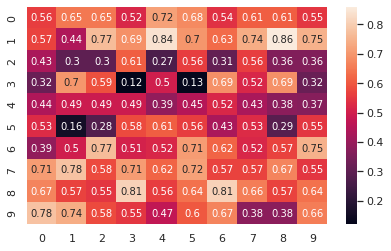

In [ ]:
import seaborn as sns
%matplotlib inline

sns.heatmap(df, annot=True)